## Trying out `pyvrp`

In [1]:
# Load packages
# fmt: off
COORDS = [
    (456, 320),  # location 0 - the depot
    (228, 0),    # location 1
    (912, 0),    # location 2
    (0, 80),     # location 3
    (114, 80),   # location 4
    (570, 160),  # location 5
    (798, 160),  # location 6
    (342, 240),  # location 7
    (684, 240),  # location 8
    (570, 400),  # location 9
    (912, 400),  # location 10
    (114, 480),  # location 11
    (228, 480),  # location 12
    (342, 560),  # location 13
    (684, 560),  # location 14
    (0, 640),    # location 15
    (798, 640),  # location 16
]
DEMANDS = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
# fmt: on


In [2]:
from pyvrp import Model

m = Model()
m.add_vehicle_type(4, capacity=15)
depot = m.add_depot(x=COORDS[0][0], y=COORDS[0][1])
clients = [
    m.add_client(x=COORDS[idx][0], y=COORDS[idx][1], delivery=DEMANDS[idx])
    for idx in range(1, len(COORDS))
]

for frm in m.locations:
    for to in m.locations:
        distance = abs(frm.x - to.x) + abs(frm.y - to.y)  # Manhattan
        m.add_edge(frm, to, distance=distance)


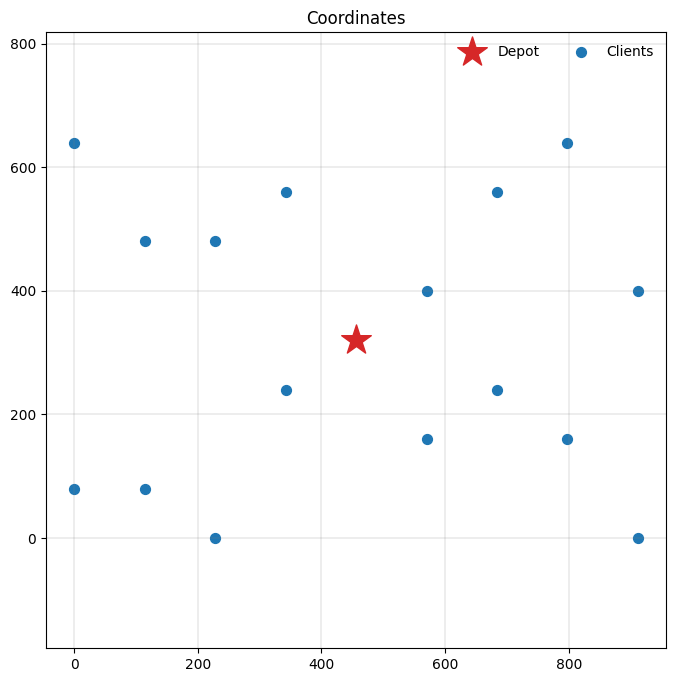

In [3]:
import matplotlib.pyplot as plt

from pyvrp.plotting import plot_coordinates

_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(m.data(), ax=ax)

In [4]:
from pyvrp.stop import MaxRuntime

res = m.solve(stop=MaxRuntime(1), display=True)  # one second

PyVRP v0.11.3

Solving an instance with:
    1 depot
    16 clients
    4 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best
H     500      1s |  45     6230     6208 |  39     6995     5905

Search terminated in 1.00s after 660 iterations.
Best-found solution has cost 6208.

Solution results
    # routes: 4
     # trips: 4
   # clients: 16
   objective: 6208
    distance: 6208
    duration: 0
# iterations: 660
    run-time: 1.00 seconds



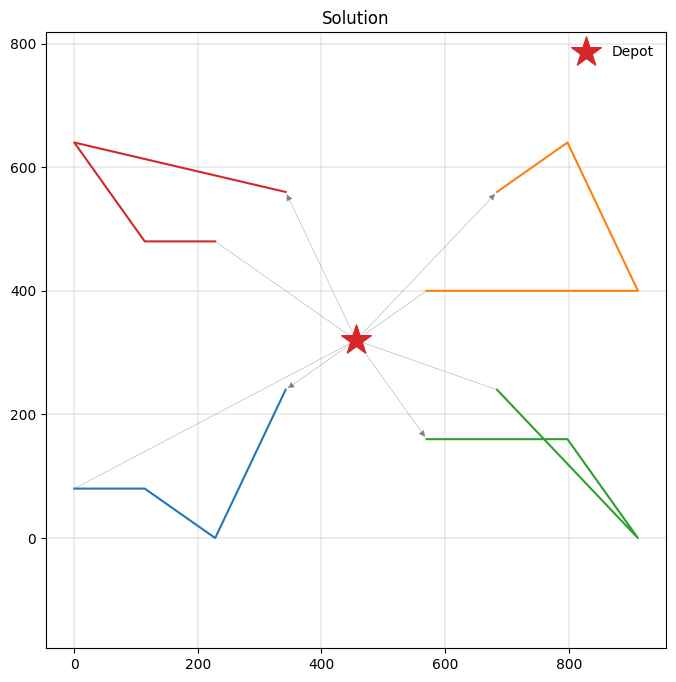

In [5]:
from pyvrp.plotting import plot_solution

_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, m.data(), ax=ax)

# Loading my own data

In [7]:
from src import helpers
import pandas as pd
fp = 'data/pairwise_dist_matrix.pkl'
pairwise_dist_matrix = helpers.read_pickle(fp)
pairwise_dist_matrix_df = pd.DataFrame(pairwise_dist_matrix)
pairwise_dist_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,20995.0,25439.0,25463.0,17623.0,22841.0,13945.0,16524.0,3667.0,19713.0,...,22924.0,12774.0,10472.0,20062.0,26858.0,23457.0,18116.0,13367.0,19671.0,25263.0
1,20995.0,0.0,21213.0,38108.0,20880.0,26646.0,21613.0,27861.0,18737.0,9412.0,...,19685.0,23286.0,23312.0,10212.0,19062.0,16770.0,15326.0,9151.0,9370.0,6320.0
2,25439.0,21213.0,0.0,21948.0,3850.0,7309.0,8709.0,13177.0,20996.0,11701.0,...,811.0,11270.0,12992.0,11710.0,5119.0,4217.0,5578.0,17684.0,11351.0,18983.0
3,25463.0,38108.0,21948.0,0.0,18434.0,12917.0,17297.0,12932.0,25066.0,30591.0,...,22095.0,16909.0,20765.0,30940.0,25110.0,26365.0,21541.0,33535.0,28617.0,37735.0
4,17623.0,20880.0,3850.0,18434.0,0.0,5093.0,5597.0,9829.0,18894.0,12084.0,...,4251.0,7922.0,7345.0,12141.0,9199.0,9114.0,4230.0,15582.0,11305.0,23018.0
5,22841.0,26646.0,7309.0,12917.0,5093.0,0.0,7890.0,7812.0,22653.0,17560.0,...,7907.0,8618.0,10340.0,17569.0,10493.0,10938.0,9524.0,19877.0,17209.0,24842.0
6,13945.0,21613.0,8709.0,17297.0,5597.0,7890.0,0.0,6662.0,14022.0,13625.0,...,8841.0,2620.0,3762.0,13928.0,12852.0,11469.0,6128.0,15963.0,13092.0,20505.0
7,16524.0,27861.0,13177.0,12932.0,9829.0,7812.0,6662.0,0.0,17217.0,19688.0,...,13443.0,4585.0,7115.0,19992.0,17799.0,17714.0,12191.0,22027.0,19155.0,31618.0
8,3667.0,18737.0,20996.0,25066.0,18894.0,22653.0,14022.0,17217.0,0.0,17337.0,...,20548.0,13141.0,10840.0,17686.0,24482.0,21081.0,15740.0,10991.0,17294.0,22887.0
9,19713.0,9412.0,11701.0,30591.0,12084.0,17560.0,13625.0,19688.0,17337.0,0.0,...,9240.0,15258.0,15284.0,877.0,9468.0,7176.0,7766.0,9806.0,607.0,7469.0


In [8]:
# My locations
my_locations = pd.read_csv("data/locations_w_node_id.csv")
my_locations.head()

,id,location_name,location_type,lat,lon,node_id
0,school_1,Admiralty Primary School,school,1.44294,103.80035,8655379195
1,school_2,Jurong West Primary School,school,1.33931,103.69903,7437327501
2,school_3,River Valley Primary School,school,1.29430,103.83593,11938018645
3,school_4,Casuarina Primary School,school,1.37281,103.95723,8302208139
4,school_5,St. Joseph’s Institution Junior,school,1.31751,103.84632,10979316519


In [33]:
COORDS

[(456, 320),
 (228, 0),
 (912, 0),
 (0, 80),
 (114, 80),
 (570, 160),
 (798, 160),
 (342, 240),
 (684, 240),
 (570, 400),
 (912, 400),
 (114, 480),
 (228, 480),
 (342, 560),
 (684, 560),
 (0, 640),
 (798, 640)]

In [34]:
COORDS = []

for i, row in my_locations.iterrows():
    x = row['lon']
    y = row['lat']
    COORDS.append((x,y))

In [36]:
len(COORDS)

31

In [51]:
clients[0].x

103

In [52]:
clients[0].y

1

In [54]:
COORDS

[(103.80035, 1.44294),
 (103.69903, 1.33931),
 (103.83593, 1.2943),
 (103.95723, 1.37281),
 (103.84632, 1.31751),
 (103.88414, 1.31845),
 (103.84266, 1.35546),
 (103.88293, 1.37256),
 (103.7773, 1.43072),
 (103.76191, 1.31566),
 (103.81951, 1.4482),
 (103.83191, 1.30395),
 (103.90201, 1.40643),
 (103.75757, 1.31652),
 (103.8223, 1.26508),
 (103.85917, 1.29419),
 (103.94974, 1.3725),
 (103.87225, 1.35052),
 (103.70525, 1.3395),
 (103.77851, 1.3385),
 (103.80069, 1.43983),
 (103.83123, 1.2925),
 (103.84788, 1.37142),
 (103.82903, 1.3724),
 (103.75977, 1.31178),
 (103.81925, 1.26658),
 (103.80813, 1.28685),
 (103.81411, 1.32408),
 (103.74459, 1.37676),
 (103.76453, 1.31324),
 (103.72125, 1.30563)]

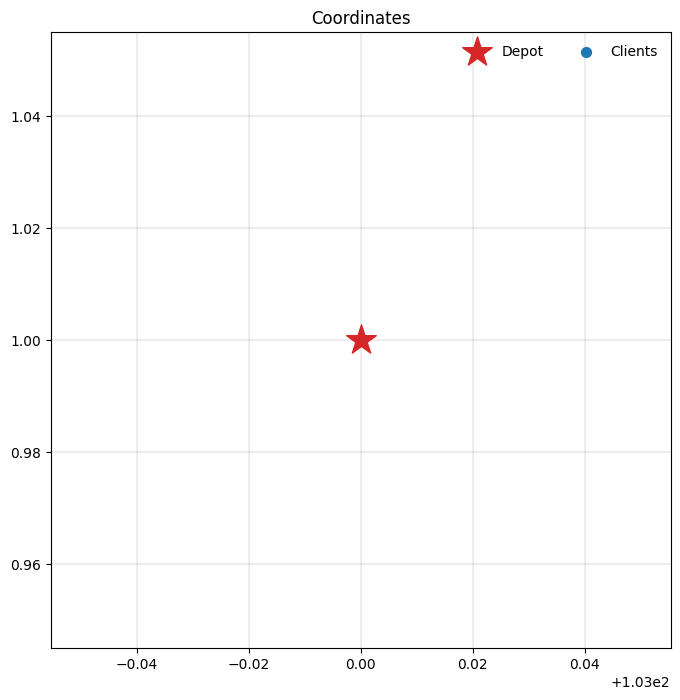

In [53]:
import math
# Modify the boilerplate code from pyvrp website
DEMANDS = [1 for i in range(len(COORDS))]

m = Model()
m.add_vehicle_type(num_available=4, capacity=math.ceil(len(COORDS)/4))
depot = m.add_depot(x=COORDS[0][0], y=COORDS[0][1])
clients = [
    m.add_client(x=COORDS[idx][0], y=COORDS[idx][1], delivery=DEMANDS[idx])
    for idx in range(1, len(COORDS))
]

# for frm in m.locations:
#     for to in m.locations:
#         distance = abs(frm.x - to.x) + abs(frm.y - to.y)  # Manhattan
#         m.add_edge(frm, to, distance=distance)

_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(m.data(), ax=ax) 

In [76]:
m.data().clients()[3].x

103

In [67]:
m.vehicle_types[0].capacity

[8]

In [55]:
res = m.solve(stop=MaxRuntime(1), display=True)  # one second

PyVRP v0.11.3

Solving an instance with:
    1 depot
    30 clients
    4 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best


/home/nicholas/git/django_map/django_map/lib/python3.10/site-packages/pyvrp/PenaltyManager.py:228: PenaltyBoundWarning: 
            A penalty parameter has reached its maximum value. This means PyVRP
            struggles to find a feasible solution for the instance that's being
            solved, either because the instance has no feasible solution, or it
            is very hard to find one. Check the instance carefully to determine
            if a feasible solution exists.
            
  warn(msg, PenaltyBoundWarning)



Search terminated in 1.00s after 184 iterations.
Best-found solution has cost 153122387330596864.

Solution results
    # routes: 4
     # trips: 4
   # clients: 30
   objective: 153122387330596864
    distance: 153122387330596864
    duration: 153122387330596864
# iterations: 184
    run-time: 1.00 seconds



In [56]:
print(res)

Solution results
    # routes: 4
     # trips: 4
   # clients: 30
   objective: 153122387330596864
    distance: 153122387330596864
    duration: 153122387330596864
# iterations: 184
    run-time: 1.00 seconds

Routes
------
Route #1: 9 23 26 22 17 12 30 10
Route #2: 13 16 3 15 11 28 1 8
Route #3: 27 14 25 4 21 29 18 20
Route #4: 24 5 6 2 7 19



In [58]:
my_locations

,id,location_name,location_type,lat,lon,node_id
0,school_1,Admiralty Primary School,school,1.44294,103.80035,8655379195
1,school_2,Jurong West Primary School,school,1.33931,103.69903,7437327501
2,school_3,River Valley Primary School,school,1.29430,103.83593,11938018645
3,school_4,Casuarina Primary School,school,1.37281,103.95723,8302208139
4,school_5,St. Joseph’s Institution Junior,school,1.31751,103.84632,10979316519
5,school_6,Geylang Methodist School Primary,school,1.31845,103.88414,8157277817
6,school_7,Whitley Secondary School,school,1.35546,103.84266,5251084191
7,school_8,Xinmin Secondary School,school,1.37256,103.88293,380363672
8,school_9,Fuchun Secondary School,school,1.43072,103.77730,10844240865
9,school_10,Clementi Town Secondary School,school,1.31566,103.76191,2391178715


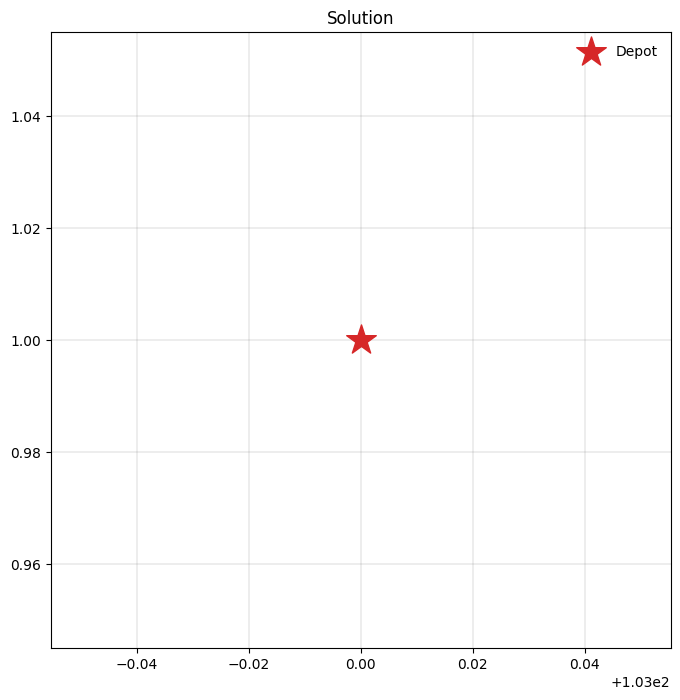

In [57]:
_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, m.data(), ax=ax)